<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/main/GoneWithTheWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [1]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 1. Load Gone With The Wind Text from Gutenberg


In [3]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [4]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [ ]:
import spacy

In [ ]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [ ]:
len(content)

2340566

In [ ]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [ ]:
characters = set(characters1) | set(characters2) | set(characters3)

In [ ]:
characters = [c for c in list(characters) if c[0].isupper()]

In [ ]:
len(characters)

777

In [ ]:
characters = sorted(characters)

In [ ]:
#remove any characters that are subsets of one another (e.g. no need for Charles and Charles Hamilton)
unique_characters = set()
for name in characters:
    if not any(f"{n.strip()} " in name.strip() or f"{n.strip()}\n" in name.strip() for n in unique_characters):
        unique_characters.add(name)

In [ ]:
len(unique_characters)

534

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(unique_characters).to_csv("possible_reduced_characters_v2.csv")

In [5]:
#import the completed list
characters = pd.read_excel("/content/possible_reduced_characters_v2 (1).xlsx")

In [6]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters = characters[['character', 'character_real']].loc[characters['character_real'] != "remove", :].reset_index(drop = True)

In [7]:
characters

,character,character_real
0,Rosa,Rosa
1,Watling,Watling
2,Kill Ashley,Ashley
3,Darcy,Darcy
4,Ulster,Ulster
...,...,...
221,Sadie Belle,Belle
222,Wynder,Wynder
223,Rene,Rene
224,India,India


In [8]:
characters['character_real'].unique()

array(['Rosa', 'Watling', 'Ashley', 'Darcy', 'Ulster', 'Scarlett',
       'Bonnie', 'Jeff\nDavis', 'Mammy', 'Merriwether', 'Jack', 'Munroe',
       'Fontaine', 'Pauline', 'Dan Tucker', 'Buck Munroe', 'Rhett',
       'Mick', 'Pharisees', 'Poke', 'Pitty', 'Sam', 'Suellen', 'Bullock',
       'Prissy', 'Susan Elinor', 'Sarah Jane', 'Phillip', 'Melanie',
       'Nathan Bedford Forrest', 'Frank', 'Robillard', 'Will', 'Bub',
       'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson',
       'Doc Fontaine', 'Charles', 'Andy Bonnell', 'Betsy', 'Carreen',
       'Brown', 'Morgan', 'Wade', 'Calverts', 'Emmie', 'Jonas', 'Betty',
       'Archie', 'Cathleen', 'Jane', 'Jerry', 'Dilcey', 'Brenton',
       'Hilton', 'Tom', 'Alex', 'Jim', 'Sylvia', 'Beau', 'Hetty Tarleton',
       'Suzannah Talbot', 'Elsing', 'Lou', 'Boyne', 'Calhoun',
       'Dolly Merriwether', 'Meade', 'John', 'Stuart', 'Caroline Irene',
       'Jeb Stuart', 'Gerald', 'Hugh', 'Melissy', 'Bonnell', 'Wilkerson',
       'T

## 3. Split Text into Narrative and Dialogue

In [9]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [10]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [11]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [12]:
result_df

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
...,...,...
13005,"""I won't think of it now,""",Dialogue
13006,"she said again, aloud, trying to push\nher mis...",Narrative
13007,"""I'll--why, I'll go home to Tara\ntomorrow,""",Dialogue
13008,and her spirits lifted faintly.\n\nShe had gon...,Narrative


In [13]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [14]:
result_df.head(n = 50)

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
6,answered Brent carelessly.,Narrative
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue
9,"""Why?""",Dialogue
11,"""The war, goose! The war's going to start any...",Dialogue
13,"""You know there isn't going to be any war,""",Dialogue


##4. Match Entities between Dialogue Sections

In [15]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['character']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['character_real']))
        ent_out.sort(key=lambda x: x[0])
        #return all characters unless they were just mentioned before
        return [ent_out[i][2] for i in range(len(ent_out)) if i == 0 or ent_out[i][2] != ent_out[i - 1][2]]

    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [16]:
result_df.head(n=50)

,text,type,Entities
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative,"[Scarlett, Tarleton, Stuart, Brent, Tarleton, ..."
1,"""I know you two don't care about being expelle...",Dialogue,None
2,she said.,Narrative,[]
3,"""But what about Boyd? He's kind of set on get...",Dialogue,None
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue,None
6,answered Brent carelessly.,Narrative,[Brent]
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue,None
9,"""Why?""",Dialogue,None
11,"""The war, goose! The war's going to start any...",Dialogue,None
13,"""You know there isn't going to be any war,""",Dialogue,None


In [17]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = pd.DataFrame(data= {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}, index=[0])
            convo_df = pd.concat([convo_df, new_row])
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

In [18]:
convo_df = convo_df.dropna()

In [19]:
def merge_characters(char1, char2):
  list_out = "_".join(sorted([char1, char2]))
  return str(list_out)

In [20]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

In [21]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

In [22]:
convo_df

,Character1,Character2,StartIndex,EndIndex,text_out,characters,character_count
0,Scarlett,Brent,1,19,"""I know you two don't care about being expelle...",Brent_Scarlett,1015
0,Stuart,Scarlett,21,27,"""The Yankees may be scared of us, but after th...",Scarlett_Stuart,971
0,Tom,Fontaine,29,33,"""Didn't she say anything when you got home las...",Fontaine_Tom,1302
0,Beatrice,Tarleton,35,35,"""Of course she won't hit Boyd. She never did ...",Beatrice_Tarleton,126
0,Stuart,Scarlett,37,49,"""That's why we left him\nat home to explain th...",Scarlett_Stuart,714
...,...,...,...,...,...,...,...
0,Ashley,Scarlett,12887,12897,"""But love can't wear out!""""Yours for Ashley di...",Ashley_Scarlett,1702
0,Rhett,Belle,12899,12911,"""It was so obvious that we were meant for each...",Belle_Rhett,2113
0,Ashley,Rhett,12913,12947,"""But then, there was Bonnie and I saw that eve...",Ashley_Rhett,2358
0,Gerald,Rhett,12949,12971,"""Don't be a fool, Rhett! I can make--""""Don't ...",Gerald_Rhett,1676


<Axes: xlabel='characters'>

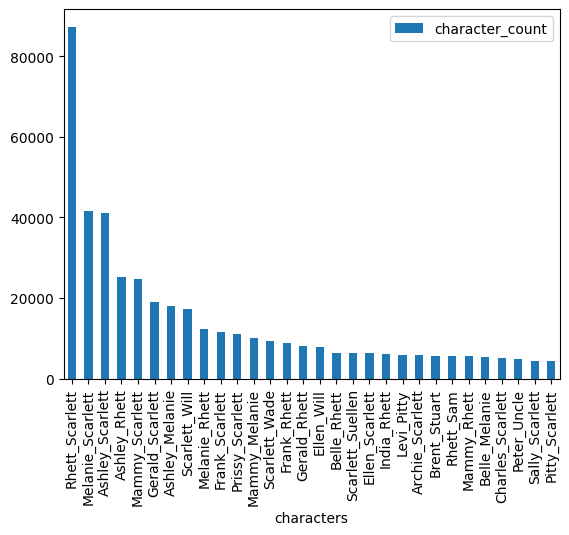

In [23]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

In [24]:
main_interactions  = ["Rhett_Scarlett", "Ashley_Scarlett", "Melanie_Scarlett", "Gerald_Scarlett"]

In [25]:
main_characters = ["Scarlett", "Rhett", "Ashley", "Gerald", "Melanie"]

In [26]:
convo_df_main = convo_df.loc[convo_df['characters'].isin(main_interactions), :].reset_index(drop = True)

<Axes: xlabel='characters'>

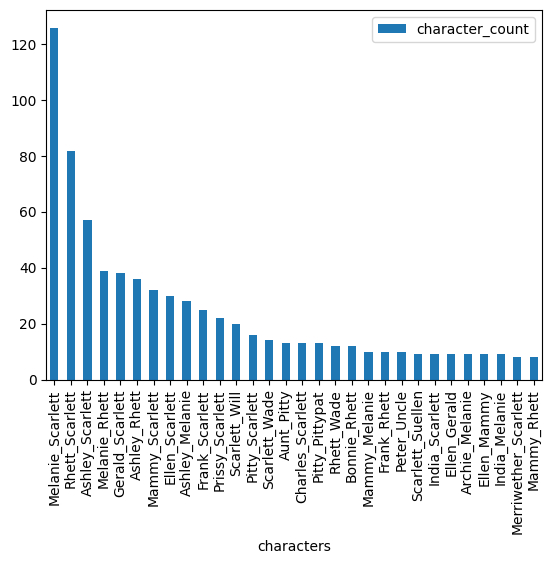

In [27]:
convo_df.groupby(['characters']).agg({'character_count': 'count'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

## 5. Pre-process Text for Regressions and LDA


### 5.1 Clean text from stopwords and other irrelevant words

In [28]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('possible_reduced_characters_v2 (1).xlsx', header=None)

# Filter the DataFrame to exclude rows where the third column contains "remove"
filtered_df = df[df.iloc[:, 2] != 'remove']

# Extract unique character names from the first column
character_names_all = filtered_df.iloc[:, 1].unique()

row_to_remove = 0
if row_to_remove < len(character_names_all):
    character_names_all = list(character_names_all)
    character_names_all.pop(row_to_remove)

# Print the extracted character names
print(character_names_all)

['Rosa', 'Watling', 'Kill Ashley', 'Darcy', 'Ulster', 'Scarlert', 'Eugenie Victoria', 'Jeff\nDavis', 'Tell Mammy', 'Merriwether', 'Jack', 'Munroe', 'Scarlett', 'Mama Fontaine', 'Pauline', 'Dan Tucker', 'Unless Ashley', 'Buck Munroe', 'Fortunately Scarlett', 'Butler', 'Mick', 'Katie\nScarlett', 'Pharisees', 'Poke', 'Pitty', 'Big Sam', 'Sue', 'Bullock', 'Damn Prissy', 'Susan Elinor', 'Sarah Jane', 'Sam', 'Phil', 'Melly', 'Nathan Bedford Forrest', 'Sometimes Frank', 'Pierre Robillard', 'All Scarlett', 'Benteen', 'Bub', 'Mellie', 'Melanie', 'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson', 'Generally Scarlett', 'Doc Fontaine', 'Dalton', 'Andy Bonnell', 'Suellen', 'Mammy, Cookie', 'Betsy', 'Small Carreen', 'Brown', 'Morgan', 'Wade', 'Calverts', 'Philip', 'Emmie', 'Kennedy', 'Jonas', 'Slattery', 'Betty', 'Bulloch', 'Off Scarlett', 'Calvert', 'Jane', 'Jerry', 'Dilcey', 'Mel--', 'Brenton', 'Yankee Hilton', 'Cathleen', 'Mees Scarlett', 'Tom', 'Mammy--Mammy', 'Wheeler', 'Alex.',

In [29]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Manually add additional stopwords
additional_stopwords = [name.lower() for name in character_names_all]
custom_list_of_extra_stopwords = ["nt", "'s", "'m", "'ve", "'em", "'ll", "'t", "'d", "us", "'re", "theres", "therere", "theyd", "theyve"]
# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english') + custom_list_of_extra_stopwords)

# Define a function to remove stopwords from text
def remove_stopwords(text):
    # Tokenize the text
    punctuation_pattern = re.compile(r'[^\w\s]')
    # Remove punctuation marks from the text
    text = punctuation_pattern.sub('', text.lower())
    for substring in additional_stopwords:
        text = text.replace(substring, '')
    #text = regex.sub("", text.lower())
    #text = re.sub(characters_pattern, '', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in all_stopwords]
    # Join tokens back into a string
    filtered_text = ' '.join(tokens_without_sw)
    return filtered_text


# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
convo_df_main['text_out_processed'] = convo_df_main['text_out'].apply(remove_stopwords)

# Print the DataFrame to see the result
convo_df_main['text_out_processed'].head(60)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                             careful careful take back
1     something important tell hardly know say itnot...
2                     none county touch statewell missy
3     reason bought asked buy herwell use buying goi...
4     twelve oaksabout usual cade settled set galler...
5     well speak uphe asked kindly sisters said hope...
6     im sorry daughter nothing child lots xmother f...
7     wish youd quit pushing dont want tara old plan...
8     youre young come love land getting away youre ...
9                      brat baptizedyes dead poor thing
10    ley hasnt idea im love himhow could know ive a...
11    getting another overseer wouldnt cheating eyet...
12    put tray come lace tighterand ill try eat litt...
13    ill remember tiful day till dieperhaps wedding...
14    mrs takes toss every huntand breaks collar bon...
15    drive well wear get horses yet course shes rig...
16           looks ifas knew looked like without shimmy
17    live barbecue till afternoonof course atte

### 5.2 Pre-processing for LDA

In [30]:
def count_tokens(text):
    # Split the text by whitespace to get tokens
    tokens = text.split()
    # Return the count of tokens
    return len(tokens)

# Apply the function to each row in the 'text_out_processed' column
convo_df_main['token_count'] = convo_df_main['text_out_processed'].apply(count_tokens)

In [33]:
import pandas as pd

# Assuming convo_df_main is your existing DataFrame

# Create a new DataFrame with only the specified columns
new_df = convo_df_main[['characters', 'token_count', 'text_out_processed']].copy()

# Display the new DataFrame
print(new_df)

           characters  token_count  \
0     Gerald_Scarlett            4   
1    Melanie_Scarlett           13   
2     Gerald_Scarlett            5   
3     Gerald_Scarlett           23   
4     Gerald_Scarlett           55   
..                ...          ...   
298  Melanie_Scarlett           11   
299  Melanie_Scarlett            3   
300  Melanie_Scarlett           51   
301    Rhett_Scarlett          293   
302   Ashley_Scarlett          148   

                                    text_out_processed  
0                            careful careful take back  
1    something important tell hardly know say itnot...  
2                    none county touch statewell missy  
3    reason bought asked buy herwell use buying goi...  
4    twelve oaksabout usual cade settled set galler...  
..                                                 ...  
298  good nightpromise meanything darling kind helo...  
299                                  woman friend ever  
300  dont want word either you

In [34]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Counting rows where token_count is less than 9 or equal to 9
count = len(new_df[(new_df['token_count'] < 9) | (new_df['token_count'] == 9)])

print("Number of rows where token_count is less than 9 or equal to 9:", count)

Number of rows where token_count is less than 9 or equal to 9: 96


In [35]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Filter rows where token_count is 9 or less
filtered_df = new_df[new_df['token_count'] <= 9]

# Count occurrences of each word in the "characters" column
word_counts = filtered_df['characters'].value_counts()

# Print the counts
print("Number of rows with 9 or less tokens for each word in 'characters' column:")
print(word_counts)

Number of rows with 9 or less tokens for each word in 'characters' column:
characters
Melanie_Scarlett    49
Ashley_Scarlett     17
Gerald_Scarlett     16
Rhett_Scarlett      14
Name: count, dtype: int64


In [36]:
# Get unique values in the "characters" column
unique_characters = new_df['characters'].unique()

# Create separate DataFrames with different variable names
for character in unique_characters:
    globals()[f'df_{character.replace(" ", "_")}'] = new_df[new_df['characters'] == character].copy()

# Now, you have separate DataFrames named df_Gerald_Scarlett, df_Melanie_Scarlett, df_Rhett_Scarlett, and df_Ashley_Scarlett

In [37]:
df_Ashley_Scarlett

,characters,token_count,text_out_processed
10,Ashley_Scarlett,65,ley hasnt idea im love himhow could know ive a...
13,Ashley_Scarlett,8,ill remember tiful day till dieperhaps wedding...
17,Ashley_Scarlett,13,live barbecue till afternoonof course attentiv...
20,Ashley_Scarlett,15,lets dont hot headed lets dont war misery worl...
26,Ashley_Scarlett,2,baby house
28,Ashley_Scarlett,5,want good time jine cavalry
61,Ashley_Scarlett,2,dear wife
64,Ashley_Scarlett,1,dixie
78,Ashley_Scarlett,13,forgive saying know love arent mad youdont sil...
80,Ashley_Scarlett,9,gentlemen georgia troops well cant get along w...


In [38]:
import pandas as pd

# List of DataFrames
dataframes = [df_Ashley_Scarlett, df_Rhett_Scarlett, df_Gerald_Scarlett, df_Melanie_Scarlett]
for df in dataframes:
    # Drop the 'characters' column
    df.drop(columns=['characters'], inplace=True)

    # Reset the index
    df.reset_index(drop=True, inplace=True)

    # Print the DataFrame after removing the 'characters' column and resetting the index
    print(df)

    token_count                                 text_out_processed
0            65  ley hasnt idea im love himhow could know ive a...
1             8  ill remember tiful day till dieperhaps wedding...
2            13  live barbecue till afternoonof course attentiv...
3            15  lets dont hot headed lets dont war misery worl...
4             2                                         baby house
5             5                        want good time jine cavalry
6             2                                          dear wife
7             1                                              dixie
8            13  forgive saying know love arent mad youdont sil...
9             9  gentlemen georgia troops well cant get along w...
10          142  perhaps old march ride shoot mrs kindly lent w...
11            2                                            god ley
12            8       news newsdont know fer sartin lady soon tell
13          238  couldnt tonight boy homewhat luckdont giggled

In [39]:
num_rows = df_Ashley_Scarlett.shape[0]
print("Number of rows in df_Ashley_Scarlett:", num_rows)

Number of rows in df_Ashley_Scarlett: 57


In [40]:
num_rows = df_Rhett_Scarlett.shape[0]
print("Number of rows in df_Rhett_Scarlett:", num_rows)

Number of rows in df_Rhett_Scarlett: 82


In [41]:
num_rows = df_Gerald_Scarlett.shape[0]
print("Number of rows in df_Gerald_Scarlett:", num_rows)

Number of rows in df_Gerald_Scarlett: 38


In [42]:
num_rows = df_Melanie_Scarlett.shape[0]
print("Number of rows in df_Melanie_Scarlett:", num_rows)

Number of rows in df_Melanie_Scarlett: 126


In [43]:
import pandas as pd

def combine_text(df):
    # Group the DataFrame into groups of 10 consecutive rows
    grouped = df.groupby(df.index // 10)

    # Aggregate each group into a single row by concatenating the text
    combined_df = grouped.agg({'text_out_processed': ' '.join, 'token_count': 'sum'}).reset_index(drop=True)

    return combined_df

# Assuming df_Ashley_Scarlett1, df_Ashley_Scarlett2, df_Ashley_Scarlett3, and df_Ashley_Scarlett4 are your dataframes
# Replace these with your actual dataframe names

# Apply the combine_text function to each dataframe
combined_df_Ashley = combine_text(df_Ashley_Scarlett)
combined_df_Rhett = combine_text(df_Rhett_Scarlett)
combined_df_Melanie = combine_text(df_Melanie_Scarlett)
combined_df_Gerald = combine_text(df_Gerald_Scarlett)

# Print the combined DataFrames
print(combined_df_Ashley)
print(combined_df_Rhett)
print(combined_df_Melanie)
print(combined_df_Gerald)

                                  text_out_processed  token_count
0  ley hasnt idea im love himhow could know ive a...          133
1  perhaps old march ride shoot mrs kindly lent w...          935
2  loved hell permit come atlanta get tax money i...          708
3  england recognized usif jeff commandeered cott...          690
4  beds dear downtown time day arent house helpin...          607
5  anything thisiyou know better never go world g...          387
                                  text_out_processed  token_count
0  husband dead longoh yes long time almost yeara...          970
1  air hungrythere wont crop yearthere aint nobod...         1097
2  put damn put walk oh would ever done without i...         1818
3  god discuss expect answer hes still love youwe...         1752
4  stranger without told word would know house bu...          266
5  man world wouldnt care much ive seen hes done ...          383
6  sat chestwas big oneoh yes dretfull big clawsa...          539
7  ragamuf

### 5.3 Pre-processing for Regression - Text Chunking

<Axes: >

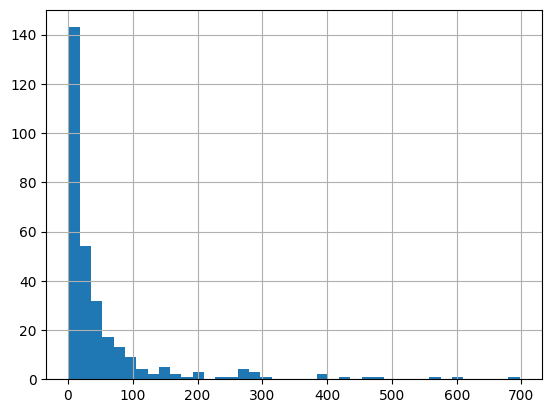

In [208]:
new_df['token_count'].hist(bins = 40)

As there are otherwise not enough rows to perform analysis on, we split the text into chunks of 30 to perform training on.

In [209]:
def split_text(text):
    words = word_tokenize(text)
    result = []
    current_item = []
    current_length = 0

    for word in words:
        if current_length + len(word) + len(current_item) > 10:
            if len(current_item) >= 30:
                result.append(current_item)
                current_item = [word]
                current_length = len(word)
            else:
                current_item += [word]
                current_length += len(word)
        else:
            current_item.append(word)
            current_length += len(word)

    if current_item:
        result.append(current_item)

    return result


def expand_dataframe(df, col_Name):
    rows = []
    for index, row in df.iterrows():
        name = row['characters']
        name_list = row[col_Name]
        for item in name_list:
            rows.append([name, " ".join(item)])

    new_df = pd.DataFrame(rows, columns=['characters', 'Chunk'])
    return new_df

In [210]:
convo_df_main['Chunks'] = convo_df_main['text_out_processed'].apply(split_text)
df_main_chunked = expand_dataframe(convo_df_main, "Chunks")

In [211]:
df_main_chunked

,characters,Chunk
0,Gerald_Scarlett,careful careful take back
1,Melanie_Scarlett,something important tell hardly know say itnot...
2,Gerald_Scarlett,none county touch statewell missy
3,Gerald_Scarlett,reason bought asked buy herwell use buying goi...
4,Gerald_Scarlett,twelve oaksabout usual cade settled set galler...
...,...,...
703,Ashley_Scarlett,love cant wear outyours ley didbut never reall...
704,Ashley_Scarlett,interrupting explain mean though god knows see...
705,Ashley_Scarlett,come back war risked arrest come back find car...
706,Ashley_Scarlett,love married knew ley see fool thought could m...


Now this data can be vectorized:

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3), max_df=0.9)

In [213]:
df_main_chunked['characters'].value_counts()

characters
Rhett_Scarlett      296
Melanie_Scarlett    192
Ashley_Scarlett     145
Gerald_Scarlett      75
Name: count, dtype: int64

As there is a class imbalance, we first want to select 30 real observations from each group, and then augment the training classes through SMOTE:

In [214]:
def select_equal_groups(group: pd.core.groupby.generic.DataFrameGroupBy, n: int):
    return group.sample(min(n, len(group)), random_state=42)

df_test = df_main_chunked.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 30)

In [215]:
df_train = df_main_chunked[~df_main_chunked.index.isin(df_test.index)]

In [216]:
print(df_train['characters'].value_counts())
print(df_test['characters'].value_counts())

characters
Rhett_Scarlett      266
Melanie_Scarlett    162
Ashley_Scarlett     115
Gerald_Scarlett      45
Name: count, dtype: int64
characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64


As one class is overbalanced, we want to reduce the majority class to 150 so that for Gerald the oversampling is not too much:

In [217]:
df_train = df_train.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 150)

In [218]:
X_train = vectorizer.fit_transform(df_train['Chunk'])
X_test = vectorizer.transform(df_test['Chunk'])
y_train = df_train.characters.reset_index(drop = True)
y_test = df_test.characters.reset_index(drop = True)

In [219]:
y_train.value_counts()

characters
Melanie_Scarlett    150
Rhett_Scarlett      150
Ashley_Scarlett     115
Gerald_Scarlett      45
Name: count, dtype: int64

In [220]:
y_test.value_counts()

characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64

In [221]:
!pip install imbalanced-learn

In [222]:
from imblearn.over_sampling import SMOTE

def smote_upsampling(X, y):
    """
    Perform SMOTE upsampling on the input features and target labels.

    Parameters:
        X (array-like): Input features.
        y (array-like): Target labels.

    Returns:
        X_resampled (array-like): Resampled features.
        y_resampled (array-like): Resampled target labels.
    """
    # Initialize SMOTE object
    smote = SMOTE()

    # Perform SMOTE upsampling
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled

# Example usage:
# X_train and y_train are your training features and labels, respectively
X_train_resampled, y_train_resampled = smote_upsampling(X_train, y_train)

In [223]:
print(y_train_resampled.value_counts())

characters
Ashley_Scarlett     150
Gerald_Scarlett     150
Melanie_Scarlett    150
Rhett_Scarlett      150
Name: count, dtype: int64


##7. Logistic Regression


We perform a GridSearch on the training data

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#make a list of parameters:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']# Penalty term
}

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
gridsearch = GridSearchCV(logreg, param_grid, cv=KFold(5, shuffle=True, random_state=42), verbose=2, n_jobs=-1)

In [225]:
gridsearch.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

Then we take the best results of the grisearch and fit it to the model:

In [226]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [227]:
cv_results_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.403067,0.143842,0.002872,0.001397,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.741667,0.700000,0.775000,0.783333,0.700000,0.740000,0.035512,1
19,1.558986,0.301723,0.003557,0.002780,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.733333,0.691667,0.775000,0.783333,0.700000,0.736667,0.037491,2
14,0.036691,0.002573,0.001669,0.000046,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.725000,0.700000,0.775000,0.783333,0.700000,0.736667,0.035978,2
18,0.041839,0.002376,0.001634,0.000106,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.725000,0.691667,0.775000,0.783333,0.700000,0.735000,0.037786,4
11,0.167092,0.042635,0.005326,0.003583,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.716667,0.691667,0.733333,0.775000,0.675000,0.718333,0.034721,5
10,0.041590,0.012270,0.003078,0.002889,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.716667,0.683333,0.716667,0.758333,0.658333,0.706667,0.033912,6
17,11.964852,0.451901,0.002076,0.000169,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",0.733333,0.633333,0.708333,0.766667,0.666667,0.701667,0.047258,7
16,0.207544,0.044197,0.001752,0.000018,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.700000,0.633333,0.641667,0.725000,0.716667,0.683333,0.038370,8
13,6.342631,0.565383,0.002178,0.000071,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.758333,0.625000,0.600000,0.691667,0.666667,0.668333,0.055126,9
12,31.039108,16.456489,0.002879,0.001312,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.700000,0.616667,0.625000,0.700000,0.675000,0.663333,0.035978,10


In [249]:
logregfinal = LogisticRegression(max_iter = 1000, solver = "liblinear", penalty = "l2", C = 10)
logregfinal.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [250]:
y_pred = logregfinal.predict(X_test)

In [251]:
y_pred

array(['Ashley_Scarlett', 'Ashley_Scarlett', 'Gerald_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Ashley_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Melanie_Scarlett',
       'Rhett_Scarlett', 'Rhett_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Melanie_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Gerald_Scarlett', 'Rhett_Scarlett', 'Gerald_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Gerald_Scarlett',
       'Rhett_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Melanie_Scarlett',
       'Rhett_Scarlett', 'Rhett_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Melan

In [231]:
from sklearn.metrics import classification_report

In [252]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Ashley_Scarlett       0.52      0.37      0.43        30
 Gerald_Scarlett       0.86      0.20      0.32        30
Melanie_Scarlett       0.44      0.57      0.49        30
  Rhett_Scarlett       0.36      0.63      0.46        30

        accuracy                           0.44       120
       macro avg       0.54      0.44      0.43       120
    weighted avg       0.54      0.44      0.43       120



In [233]:
!pip install eli5

In [253]:
import eli5
eli5.show_weights(logregfinal, feature_names = vectorizer.get_feature_names_out())

Check the results of the performance

In [235]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score

default_metrics = {
    'accuracy': accuracy_score,
    'recall': lambda y_t, y_p: recall_score(y_t, y_p, zero_division="warn", average='micro'),
    'precision': lambda y_t, y_p: precision_score(y_t, y_p, zero_division="warn", average='micro'),
    'f1': lambda y_t, y_p: f1_score(y_t, y_p, zero_division= "warn", average ='macro')
}


def plot_accuracy(df, metrics):
    y_true = df['characters']
    y_pred = df['prediction']

    # Plot count confusion matrix
    cm_disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    # Show plot
    plt.show()

    # Calculate metrics
    metrics = {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
    print(metrics)

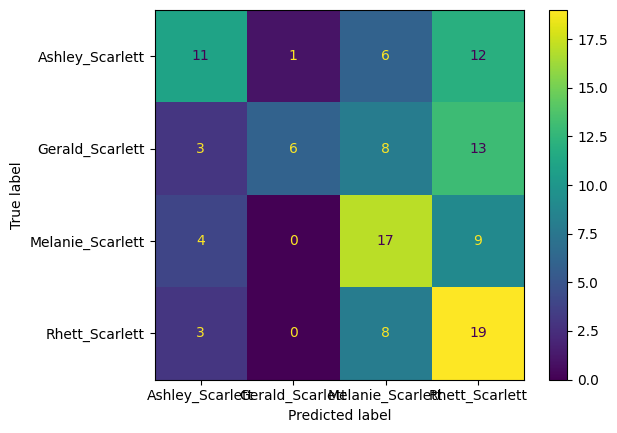

{'accuracy': 0.44166666666666665, 'recall': 0.44166666666666665, 'precision': 0.44166666666666665, 'f1': 0.4265704554583857}


In [254]:
df_test['prediction'] = y_pred
plot_accuracy(df_test, default_metrics)

## 8. Sentiment Analysis Regression

In [119]:
from transformers import pipeline
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student", max_length = 512, truncation = True)

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    tokenizer = tokenizer,
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [152]:
# Sentiment Analysis (Positive Score)
def get_sentiment_score(sentiment_results):
    # Extract positive and negative scores
    positive_score = sentiment_results[0][0]['score']
    negative_score = sentiment_results[0][2]['score']

    # Choose the score based on the highest absolute value
    if abs(positive_score) > abs(negative_score):
        return positive_score
    else:
        return -1 * negative_score

tokenizer_kwargs = {'truncation':True,'max_length':512}
def sentiment_analysis_score(text):
    sentiment_results = distilled_student_sentiment_classifier(text, **tokenizer_kwargs)
    positive_score = sentiment_results[0][0]['score']
    negative_score = sentiment_results[0][2]['score']

    # Choose the score based on the highest absolute value
    if abs(positive_score) > abs(negative_score):
        return positive_score
    else:
        return -1 * negative_score

In [255]:
df_main_chunked['sent_score'] = df_main_chunked['Chunk'].apply(sentiment_analysis_score)

In [256]:
df_main_chunked.groupby(['characters']).agg({'sent_score': 'mean'})

,sent_score
characters,
Ashley_Scarlett,-0.150732
Gerald_Scarlett,-0.175871
Melanie_Scarlett,-0.160971
Rhett_Scarlett,-0.208159


In [257]:
y_train_sent = df_main_chunked['sent_score'][df_main_chunked.index.isin(df_train.index)]
y_test_sent = df_main_chunked['sent_score'][df_main_chunked.index.isin(df_test.index)]

In [258]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train_sent)

RandomForestRegressor(random_state=42)

In [259]:
import numpy as np
importances = RF_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()  # Assuming X is a DataFrame and columns represent feature names

# Sort feature importances in descending order
indices = np.argsort(importances)

# Top 20 features
top_indices = indices[-20:]

# Bottom 20 features
bottom_indices = indices[:20]

# Print the top 20 feature ranking
print("Top 20 most important features:")
for i, idx in enumerate(top_indices[::-1]):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {importances[idx]}")

# Print the bottom 20 feature ranking
print("\nBottom 20 least important features:")
for i, idx in enumerate(bottom_indices):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {importances[idx]}")

Top 20 most important features:
1. Feature 'house': 0.01953568145620799
2. Feature 'anything': 0.018968507862418448
3. Feature 'dear': 0.014892428270480094
4. Feature 'like': 0.014274988760139449
5. Feature 'ley': 0.013079861367798117
6. Feature 'darling': 0.01275999091914521
7. Feature 'ive': 0.010506175734641198
8. Feature 'didnt': 0.010278444257443998
9. Feature 'come': 0.010219654637088784
10. Feature 'stay': 0.009533719806715506
11. Feature 'think': 0.009091904058081983
12. Feature 'time': 0.009076014054690426
13. Feature 'know': 0.008926008569187705
14. Feature 'mother': 0.008631488354148613
15. Feature 'love': 0.007542956223694671
16. Feature 'number': 0.007429126542110119
17. Feature 'knew': 0.007309896509356181
18. Feature 'right': 0.007306652156363903
19. Feature 'everything': 0.007301894104305901
20. Feature 'daughterdaughter': 0.0072413554932607115

Bottom 20 least important features:
1. Feature 'like yougods nightgownarent': 0.0
2. Feature 'pull wilkes': 0.0
3. Feature 'ha

## 9. LDA

In [117]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
# Extract text data from the DataFrame
data = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

# Create a dictionary from the preprocessed data
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the preprocessed text data into bag-of-words format
bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['mrs', 'old', 'poor', 'little', 'better', 'one', 'make', 'mr', 'talk', 'maybe']
Topic: 1
Words: ['back', 'wouldnt', 'leave', 'keep', 'poor', 'came', 'mean', 'men', 'thought', 'thats']
Topic: 2
Words: ['baby', 'id', 'ive', 'look', 'mustnt', 'dead', 'one', 'back', 'talk', 'afraid']
Topic: 3
Words: ['mrs', 'make', 'bring', 'mr', 'little', 'mean', 'help', 'things', 'house', 'something']
Topic: 4
Words: ['wouldnt', 'thought', 'something', 'mr', 'make', 'really', 'mrs', 'sweet', 'feel', 'poor']


In [118]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

Text 1 Topics:
Topic 1: ['know', 'think', 'mr', 'want', 'little', 'get', 'shes', 'got', 'honey', 'tried']
Topic 2: ['want', 'got', 'know', 'get', 'honey', 'mr', 'little', 'tried', 'think', 'ill']
Topic 3: ['know', 'think', 'get', 'mr', 'want', 'got', 'shes', 'honey', 'take', 'lace']
Topic 4: ['know', 'think', 'get', 'honey', 'didnt', 'got', 'havent', 'want', 'ever', 'little']
Topic 5: ['shes', 'know', 'honey', 'little', 'got', 'mr', 'get', 'home', 'want', 'ley']
Text 2 Topics:
Topic 1: ['go', 'think', 'im', 'hospital', 'must', 'quite', 'know', 'mrs', 'lead', 'like']
Topic 2: ['think', 'mrs', 'go', 'quite', 'hospital', 'im', 'must', 'lead', 'know', 'enough']
Topic 3: ['think', 'go', 'quite', 'mrs', 'know', 'must', 'hospital', 'dont', 'enough', 'im']
Topic 4: ['think', 'quite', 'must', 'know', 'hospital', 'im', 'go', 'mrs', 'darling', 'home']
Topic 5: ['think', 'go', 'im', 'hospital', 'know', 'mrs', 'must', 'quite', 'like', 'well']
Text 3 Topics:
Topic 1: ['heart', 'oh', 'without', 'dear